#### EDA and Feature Eingeering of google play store dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
df.to_csv("google_play_store.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [5]:
df.shape

(10841, 13)

In [6]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [7]:
## messing values
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [8]:
df['Reviews'].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

In [9]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [10]:
df['Reviews'].str.isnumeric().sum()

10840

In [11]:
df[~df['Reviews'].str.isnumeric()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [12]:
df.head();
## As we can see the data representation is not in the right format

In [13]:
df[~df['Reviews'].str.isnumeric()].Reviews.replace('3.0M',3000000)

10472    3000000
Name: Reviews, dtype: int64

In [14]:
df[~df['Reviews'].str.isnumeric()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [15]:
df['Reviews']=df['Reviews'].replace('3.0M',3000000)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [17]:
df[df['Reviews']=='3.0M']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [18]:
df['Reviews'].str.isnumeric().sum()

10840

In [19]:
df.__len__()

10841

In [20]:
df['Reviews']=df['Reviews'].astype(int)

In [21]:
l=list(df['Reviews'])
type(l[0])
for i in l:
    if(type(i)!=int):
        print(i)

In [22]:
## We can even delete the data set which is not in propper format as the size of our dataset is very large
# df=df.drop(df.index[10472])

In [23]:
## Now the Reviews are alredy in int format not in object format
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  int32  
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), int32(1), object(11)
memory usage: 1.0+ MB


In [24]:
l=list(df.Size.unique())
l1=[]
for i in l:
    if 'M' in i or 'm' in i or 'k' in i or 'K' in i :
        continue
    else:
        l1.append(i)
print(l1)
## We will skip these data set as the size dataset is very large

['Varies with device', '1,000+']


In [25]:
df_1=df.loc[df['Size'].str.contains('M')]
df_1['Size']=df_1['Size'].str.replace('M','')
df_1['Size']=df_1['Size'].astype(float)
df_1['Size']=df_1['Size']*1000
# df_1.info()
# df_1['Size']=df_1['Size'].astype(int)
df_1['Size']
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8829 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8829 non-null   object 
 1   Category        8829 non-null   object 
 2   Rating          7471 non-null   float64
 3   Reviews         8829 non-null   int32  
 4   Size            8829 non-null   float64
 5   Installs        8829 non-null   object 
 6   Type            8829 non-null   object 
 7   Price           8829 non-null   object 
 8   Content Rating  8829 non-null   object 
 9   Genres          8829 non-null   object 
 10  Last Updated    8829 non-null   object 
 11  Current Ver     8825 non-null   object 
 12  Android Ver     8827 non-null   object 
dtypes: float64(2), int32(1), object(10)
memory usage: 931.2+ KB


In [26]:
df_2=df.loc[df['Size'].str.contains('k',case=False)]
df_2['Size']=df_2['Size'].str.replace('k','')
df_2['Size']=df_2['Size'].str.replace('K','')
df_2['Size']=df_2['Size'].astype(float)
# df_2['Size']=df_2['Size'].astype(int)
df_2['Size']

58        201.0
209        23.0
384        79.0
450       118.0
458       695.0
          ...  
10763     552.0
10764     885.0
10798    1020.0
10832     582.0
10833     619.0
Name: Size, Length: 316, dtype: float64

In [27]:
df_3=df[df['Size']==l1[0]]
df_3['Size']=df_3['Size'].replace(l1[0],np.nan)
df_3.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
37,Floor Plan Creator,ART_AND_DESIGN,4.1,36639,NaN,"5,000,000+",Free,0,Everyone,Art & Design,"July 14, 2018",Varies with device,2.3.3 and up
42,Textgram - write on photos,ART_AND_DESIGN,4.4,295221,NaN,"10,000,000+",Free,0,Everyone,Art & Design,"July 30, 2018",Varies with device,Varies with device
52,Used Cars and Trucks for Sale,AUTO_AND_VEHICLES,4.6,17057,NaN,"1,000,000+",Free,0,Everyone,Auto & Vehicles,"July 30, 2018",Varies with device,Varies with device
67,Ulysse Speedometer,AUTO_AND_VEHICLES,4.3,40211,NaN,"5,000,000+",Free,0,Everyone,Auto & Vehicles,"July 30, 2018",Varies with device,Varies with device
68,REPUVE,AUTO_AND_VEHICLES,3.9,356,NaN,"100,000+",Free,0,Everyone,Auto & Vehicles,"May 25, 2018",Varies with device,Varies with device


In [28]:
df_4=df[df['Size']==l1[1]]
df_4['Size']=df_4['Size'].replace(l1[1],1000)
df_4

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3000000,1000,Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [29]:
l=[df_1,df_2,df_3,df_4]
df=pd.concat(l)
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10725,Posta App,MAPS_AND_NAVIGATION,3.6,8,NaN,"1,000+",Free,0,Everyone,Maps & Navigation,"September 27, 2017",Varies with device,4.4 and up
10765,Chat For Strangers - Video Chat,SOCIAL,3.4,622,NaN,"100,000+",Free,0,Mature 17+,Social,"May 23, 2018",Varies with device,Varies with device
10826,Frim: get new friends on local chat rooms,SOCIAL,4.0,88486,NaN,"5,000,000+",Free,0,Mature 17+,Social,"March 23, 2018",Varies with device,Varies with device
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,NaN,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [30]:
df=df.reset_index(drop=True)
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Posta App,MAPS_AND_NAVIGATION,3.6,8,NaN,"1,000+",Free,0,Everyone,Maps & Navigation,"September 27, 2017",Varies with device,4.4 and up
10837,Chat For Strangers - Video Chat,SOCIAL,3.4,622,NaN,"100,000+",Free,0,Mature 17+,Social,"May 23, 2018",Varies with device,Varies with device
10838,Frim: get new friends on local chat rooms,SOCIAL,4.0,88486,NaN,"5,000,000+",Free,0,Mature 17+,Social,"March 23, 2018",Varies with device,Varies with device
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,NaN,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [31]:
df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000+', '500,000,000+', '50+', '100+', '500+', '10+', '1+', '5+',
       '1,000,000,000+', '0+', '0', 'Free'], dtype=object)

In [32]:
df['Price'].unique()

array(['0', '$4.99', '$6.99', '$1.49', '$3.99', '$7.99', '$5.99', '$2.99',
       '$1.99', '$9.99', '$0.99', '$9.00', '$5.49', '$10.00', '$24.99',
       '$11.99', '$79.99', '$16.99', '$14.99', '$1.00', '$29.99',
       '$12.99', '$3.49', '$7.49', '$1.50', '$19.99', '$15.99', '$33.99',
       '$74.99', '$39.99', '$2.49', '$4.49', '$1.70', '$2.00', '$3.88',
       '$25.99', '$399.99', '$17.99', '$400.00', '$3.02', '$1.76',
       '$4.84', '$4.77', '$1.61', '$1.59', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$8.99', '$1.96', '$19.40', '$15.46', '$3.04', '$4.29',
       '$2.60', '$3.28', '$4.60', '$28.99', '$10.99', '$2.90', '$1.97',
       '$200.00', '$89.99', '$2.56', '$30.99', '$3.61', '$394.99',
       '$1.26', '$6.49', '$1.20', '$1.29', '$5.00', '$4.80', '$1.04',
       '$3.95', '$2.50', '$3.90', '$4.59', '$2.95', 'Everyone'],
      dtype=object)

In [33]:
char=['+',',','$']
clean=['Installs','Price']
for char in char:
    for cols in clean:
        df[cols]=df[cols].str.replace(char,'')

In [34]:
df['Price']=df['Price'].str.replace('Everyone','0')
df['Price'].unique()

array(['0', '4.99', '6.99', '1.49', '3.99', '7.99', '5.99', '2.99',
       '1.99', '9.99', '0.99', '9.00', '5.49', '10.00', '24.99', '11.99',
       '79.99', '16.99', '14.99', '1.00', '29.99', '12.99', '3.49',
       '7.49', '1.50', '19.99', '15.99', '33.99', '74.99', '39.99',
       '2.49', '4.49', '1.70', '2.00', '3.88', '25.99', '399.99', '17.99',
       '400.00', '3.02', '1.76', '4.84', '4.77', '1.61', '1.59', '13.99',
       '299.99', '379.99', '37.99', '18.99', '389.99', '19.90', '8.49',
       '1.75', '14.00', '4.85', '46.99', '109.99', '154.99', '3.08',
       '2.59', '8.99', '1.96', '19.40', '15.46', '3.04', '4.29', '2.60',
       '3.28', '4.60', '28.99', '10.99', '2.90', '1.97', '200.00',
       '89.99', '2.56', '30.99', '3.61', '394.99', '1.26', '6.49', '1.20',
       '1.29', '5.00', '4.80', '1.04', '3.95', '2.50', '3.90', '4.59',
       '2.95'], dtype=object)

In [35]:
df['Price'].unique()
df['Price']

0        0
1        0
2        0
3        0
4        0
        ..
10836    0
10837    0
10838    0
10839    0
10840    0
Name: Price, Length: 10841, dtype: object

In [36]:
df['Installs'].unique()

array(['10000', '500000', '5000000', '50000000', '100000', '50000',
       '1000000', '10000000', '5000', '100000000', '1000', '500000000',
       '50', '100', '500', '10', '1', '5', '1000000000', '0', 'Free'],
      dtype=object)

In [37]:
df['Installs']=df['Installs'].str.replace('Free','0')

In [38]:
df['Installs']=df['Installs'].astype(int)
df['Installs']

0           10000
1          500000
2         5000000
3        50000000
4          100000
           ...   
10836        1000
10837      100000
10838     5000000
10839        1000
10840           0
Name: Installs, Length: 10841, dtype: int32

In [39]:
df['Price']=df['Price'].astype(float)
df['Price'].unique()

array([  0.  ,   4.99,   6.99,   1.49,   3.99,   7.99,   5.99,   2.99,
         1.99,   9.99,   0.99,   9.  ,   5.49,  10.  ,  24.99,  11.99,
        79.99,  16.99,  14.99,   1.  ,  29.99,  12.99,   3.49,   7.49,
         1.5 ,  19.99,  15.99,  33.99,  74.99,  39.99,   2.49,   4.49,
         1.7 ,   2.  ,   3.88,  25.99, 399.99,  17.99, 400.  ,   3.02,
         1.76,   4.84,   4.77,   1.61,   1.59,  13.99, 299.99, 379.99,
        37.99,  18.99, 389.99,  19.9 ,   8.49,   1.75,  14.  ,   4.85,
        46.99, 109.99, 154.99,   3.08,   2.59,   8.99,   1.96,  19.4 ,
        15.46,   3.04,   4.29,   2.6 ,   3.28,   4.6 ,  28.99,  10.99,
         2.9 ,   1.97, 200.  ,  89.99,   2.56,  30.99,   3.61, 394.99,
         1.26,   6.49,   1.2 ,   1.29,   5.  ,   4.8 ,   1.04,   3.95,
         2.5 ,   3.9 ,   4.59,   2.95])

In [40]:
df['Price'].value_counts()

Price
0.00      10041
0.99        148
2.99        129
1.99         73
4.99         72
          ...  
109.99        1
154.99        1
3.08          1
2.59          1
2.95          1
Name: count, Length: 92, dtype: int64

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  int32  
 4   Size            9146 non-null   float64
 5   Installs        10841 non-null  int32  
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(3), int32(2), object(8)
memory usage: 1016.5+ KB


In [42]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [43]:
df['Last Updated'].unique()

array(['January 7, 2018', 'January 15, 2018', 'August 1, 2018', ...,
       'January 30, 2017', 'September 12, 2015', '1.0.19'], dtype=object)

In [44]:
df[df['Last Updated']=='1.0.19']
## One value has data lable mismatched it is not in any of the precribed prper data format
## we estimate the value for it

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10840,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3000000,1000.0,0,0,0.0,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [45]:
df['Last Updated']=df['Last Updated'].str.replace('1.0.19','January 1, 2019')

In [46]:
df['Last Updated']=pd.to_datetime(df['Last Updated'])

In [47]:
df['last_update_Day']=df['Last Updated'].dt.day
df['last_update_Month']=df['Last Updated'].dt.month
df['last_update_Year']=df['Last Updated'].dt.year

In [48]:
df.head();

In [49]:
df['Content Rating'].value_counts()

Content Rating
Everyone           8714
Teen               1208
Mature 17+          499
Everyone 10+        414
Adults only 18+       3
Unrated               2
Name: count, dtype: int64

#### EDA

In [50]:
df.duplicated().sum()

483

In [51]:
df[df.duplicated()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,last_update_Day,last_update_Month,last_update_Year
201,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37000.0,10000000,Free,0.0,Everyone,Business,2018-07-20,4.1.28165.0716,4.0 and up,20,7,2018
207,Zenefits,BUSINESS,4.2,296,14000.0,50000,Free,0.0,Everyone,Business,2018-06-15,3.2.1,4.1 and up,15,6,2018
208,Google Ads,BUSINESS,4.3,29313,20000.0,5000000,Free,0.0,Everyone,Business,2018-07-30,1.12.0,4.0.3 and up,30,7,2018
209,FreshBooks Classic,BUSINESS,4.1,1802,26000.0,100000,Free,0.0,Everyone,Business,2018-04-18,1.7.14,4.2 and up,18,4,2018
210,Insightly CRM,BUSINESS,3.8,1383,51000.0,100000,Free,0.0,Everyone,Business,2018-07-12,3.24.1,5.0 and up,12,7,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10675,Do It Later: Tasks & To-Dos,PRODUCTIVITY,4.5,123412,NaN,50000000,Free,0.0,Everyone,Productivity,2018-04-13,Varies with device,Varies with device,13,4,2018
10676,To-Do Calendar Planner,PRODUCTIVITY,4.2,30291,NaN,1000000,Free,0.0,Everyone,Productivity,2018-05-29,Varies with device,Varies with device,29,5,2018
10677,Wunderlist: To-Do List & Tasks,PRODUCTIVITY,4.6,404610,NaN,10000000,Free,0.0,Everyone,Productivity,2018-04-06,Varies with device,Varies with device,6,4,2018
10679,"TickTick: To Do List with Reminder, Day Planner",PRODUCTIVITY,4.6,25370,NaN,1000000,Free,0.0,Everyone,Productivity,2018-08-06,Varies with device,Varies with device,6,8,2018


In [52]:
df.duplicated('App').sum()

1181

In [53]:
df[df.duplicated('App')].shape

(1181, 16)

#### The dataset has multiple duplicate Records 
The reason behind finding the duplicate values is unknown
Will reason about later

In [54]:
df=df.drop_duplicates(subset=['App'],keep='first')

In [55]:
df[df.duplicated('App')].shape

(0, 16)

In [56]:
## Segregating the data feature i.e Numerical and categorical features
numerical_feature=[feature for feature in df.columns if df[feature].dtype !='O']
categorical_feature=[feature for feature in df.columns if df[feature].dtype == 'O']

In [57]:
numerical_feature,len(numerical_feature)

(['Rating',
  'Reviews',
  'Size',
  'Installs',
  'Price',
  'Last Updated',
  'last_update_Day',
  'last_update_Month',
  'last_update_Year'],
 9)

In [58]:
categorical_feature,len(categorical_feature)

(['App',
  'Category',
  'Type',
  'Content Rating',
  'Genres',
  'Current Ver',
  'Android Ver'],
 7)

#### Visualization Diagram

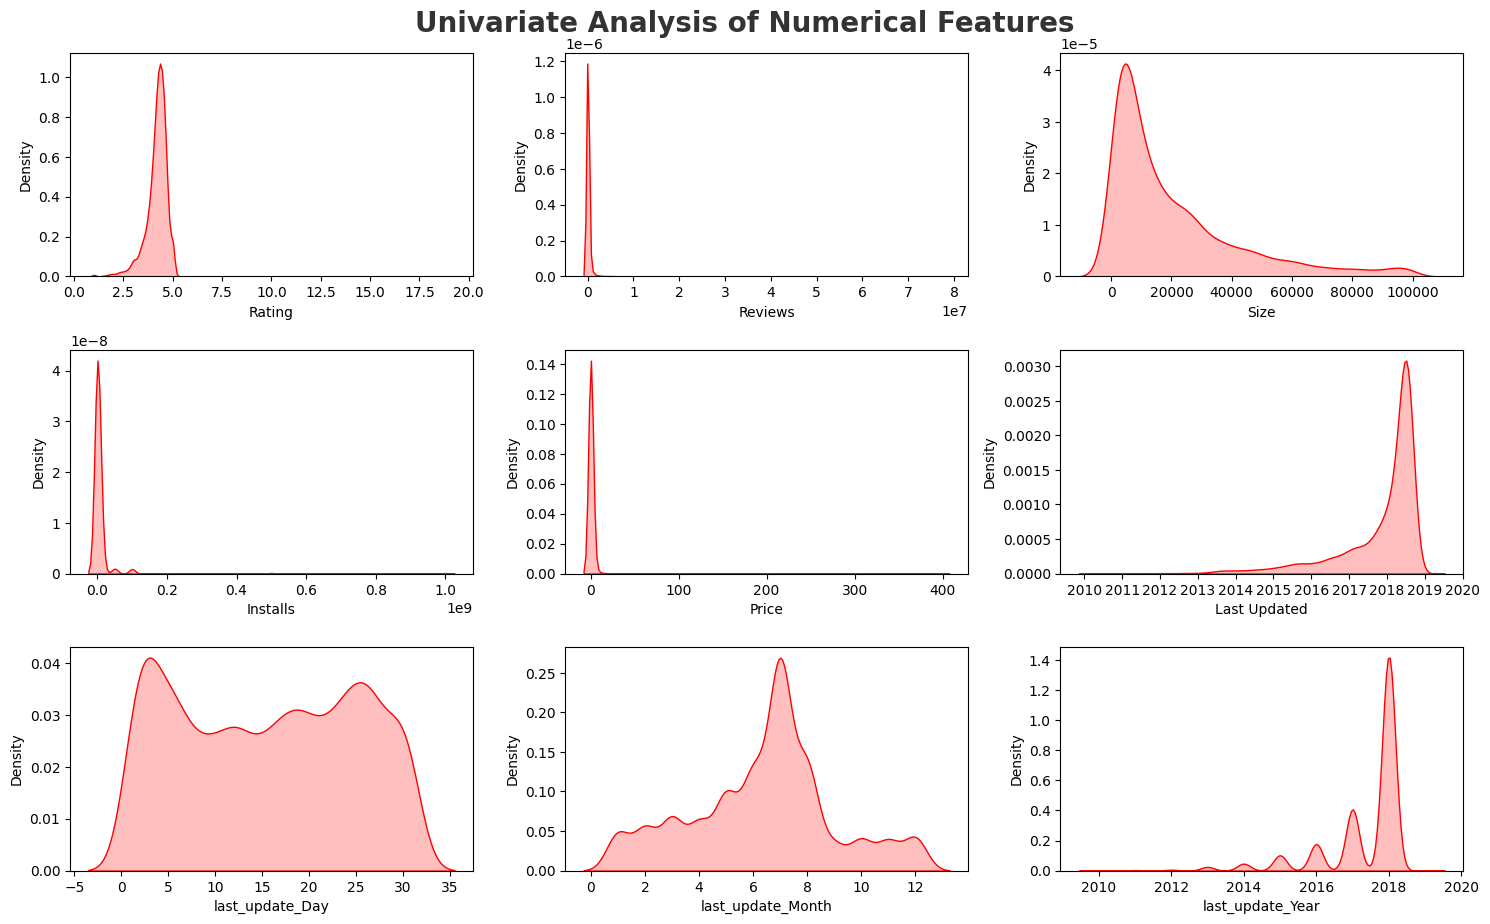

In [64]:
plt.figure(figsize=(15,15))
plt.suptitle("Univariate Analysis of Numerical Features",fontsize=20,fontweight='bold',alpha=0.8)
for i in range(len(numerical_feature)):
    plt.subplot(5,3,i+1)
    sns.kdeplot(x=df[numerical_feature[i]],shade=True,color='r')
    plt.xlabel(numerical_feature[i])
    plt.tight_layout()

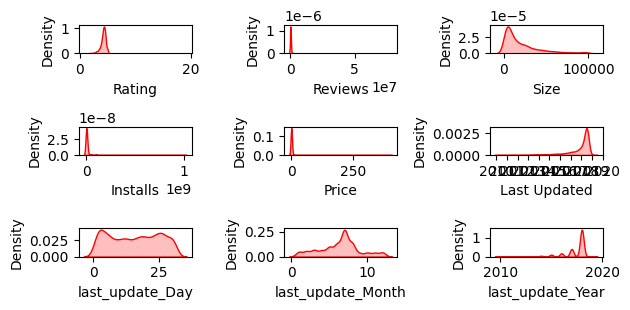

In [65]:
for i in range(len(numerical_feature)):
    plt.subplot(5,3,i+1)
    sns.kdeplot(x=df[numerical_feature[i]],shade=True,color='r')
    plt.xlabel(numerical_feature[i])
    plt.tight_layout()

#### Observation

In [66]:
## Number of free apps wey outnumber the apps which have fee for downloading thte app
## maximum apps are recentely updates => last updates grapg graph is right skewed
## for Size opf the app the graph is left skewed

In [67]:
## Categorical columns